## Step :1 Reading and Understanding the data

**NOTE : Dataset and notebook are in same path**

In [620]:
# Supressing warnings

import warnings
warnings.filterwarnings('ignore')

In [621]:
# Importing libraries

import numpy as np
import pandas as pd

In [622]:
# Reading the dataset

cars=pd.read_csv("CarPrice_Assignment.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [623]:
# Checking for missing values


cars.isnull().sum(axis=0)      # by columns

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

**So, no missing values in the dataset. We can proceed with our next analysis.**

In [624]:
# Shape of the dataset

cars.shape

(205, 26)

So, it has 26 columns and 205 rows

In [625]:
# Checking the info of the dataset

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [626]:
# describing the dataset

cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Step 2 : Visualising the dataset

Now, we will try to understand the data by visualising through numerical variables and categorical variables.
- We will check the multicollinearlity
- We will check the predictors(independent variables) having any direct influence with the outcome variables.

In [627]:
# importing necessary libraries to visualize

import matplotlib.pyplot as plt
import seaborn as sns

**Visualizing numerical variables**

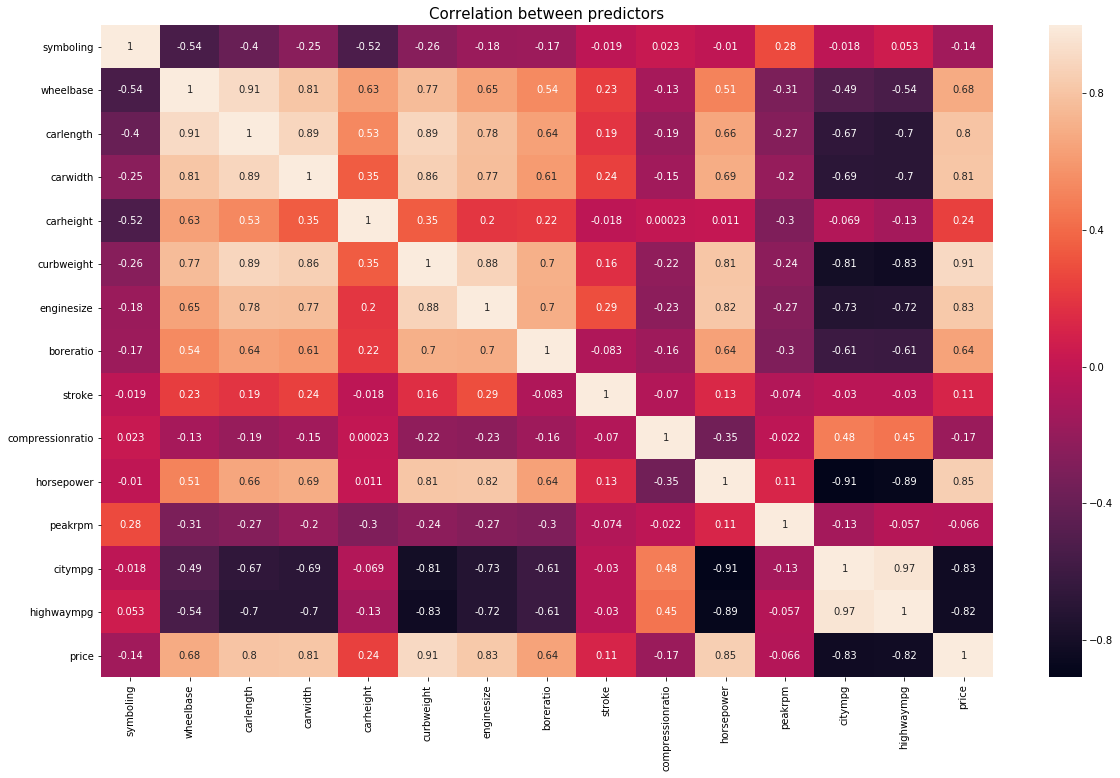

In [628]:
# Plotting for all numerical variables

plt.figure(figsize=(20,12))

data=cars.drop(['car_ID'],axis=1)
plt.title('Correlation between predictors',fontsize=15)
sns.heatmap(data=data.corr(method='spearman'),annot=True)       # Visualising with heatmap to find the correlations
plt.show()

**Insights :**
- Multicollinearlity : From above heatmap, we can conclude that there are some pretty high correlations among predictors which leads us to the concept called Multicollinearlity which is very dangerous for creating a model as they might turn out to be redundant. So, we will drop those variables which are having high correlations among predictors.
    - The predictors which we can drop are 'horsepower','citympg','carlength','carwidth' and 'curbweight' because they might turns out to be redundant.
- There are some good correlations between predictors and target variables hence we can proceed to create a MLP(Multiple Linear regression) model.

In [629]:
# Dropping columns 'horsepower','citympg','carlength','carwidth' and 'curbweight' from the dataset

cars=cars.drop(['horsepower','citympg','carlength','carwidth','curbweight'],axis=1)

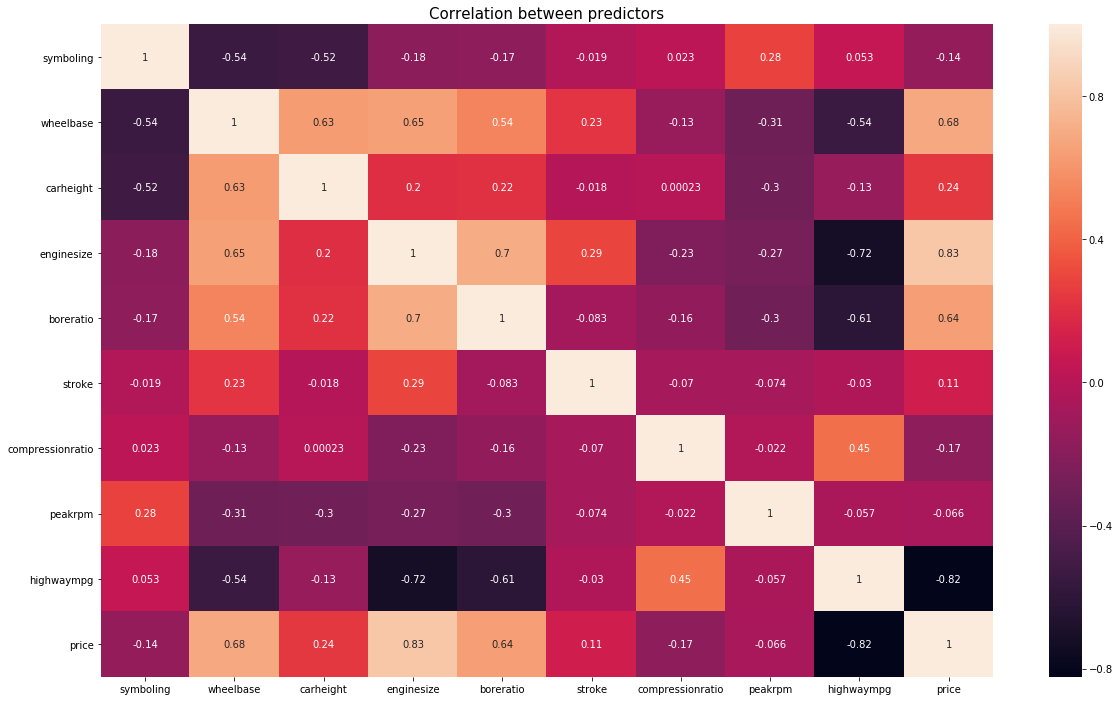

In [630]:
# Plotting for all numerical variables

plt.figure(figsize=(20,12))

data=cars.drop(['car_ID'],axis=1)
plt.title('Correlation between predictors',fontsize=15)
sns.heatmap(data=data.corr(method='spearman'),annot=True)        # Visualizing with heatmap
plt.show()

Now, we can proceed with our next analysis as we have removed all the high multicolliearity variables or predictors.

**Visualizing categorical variables**

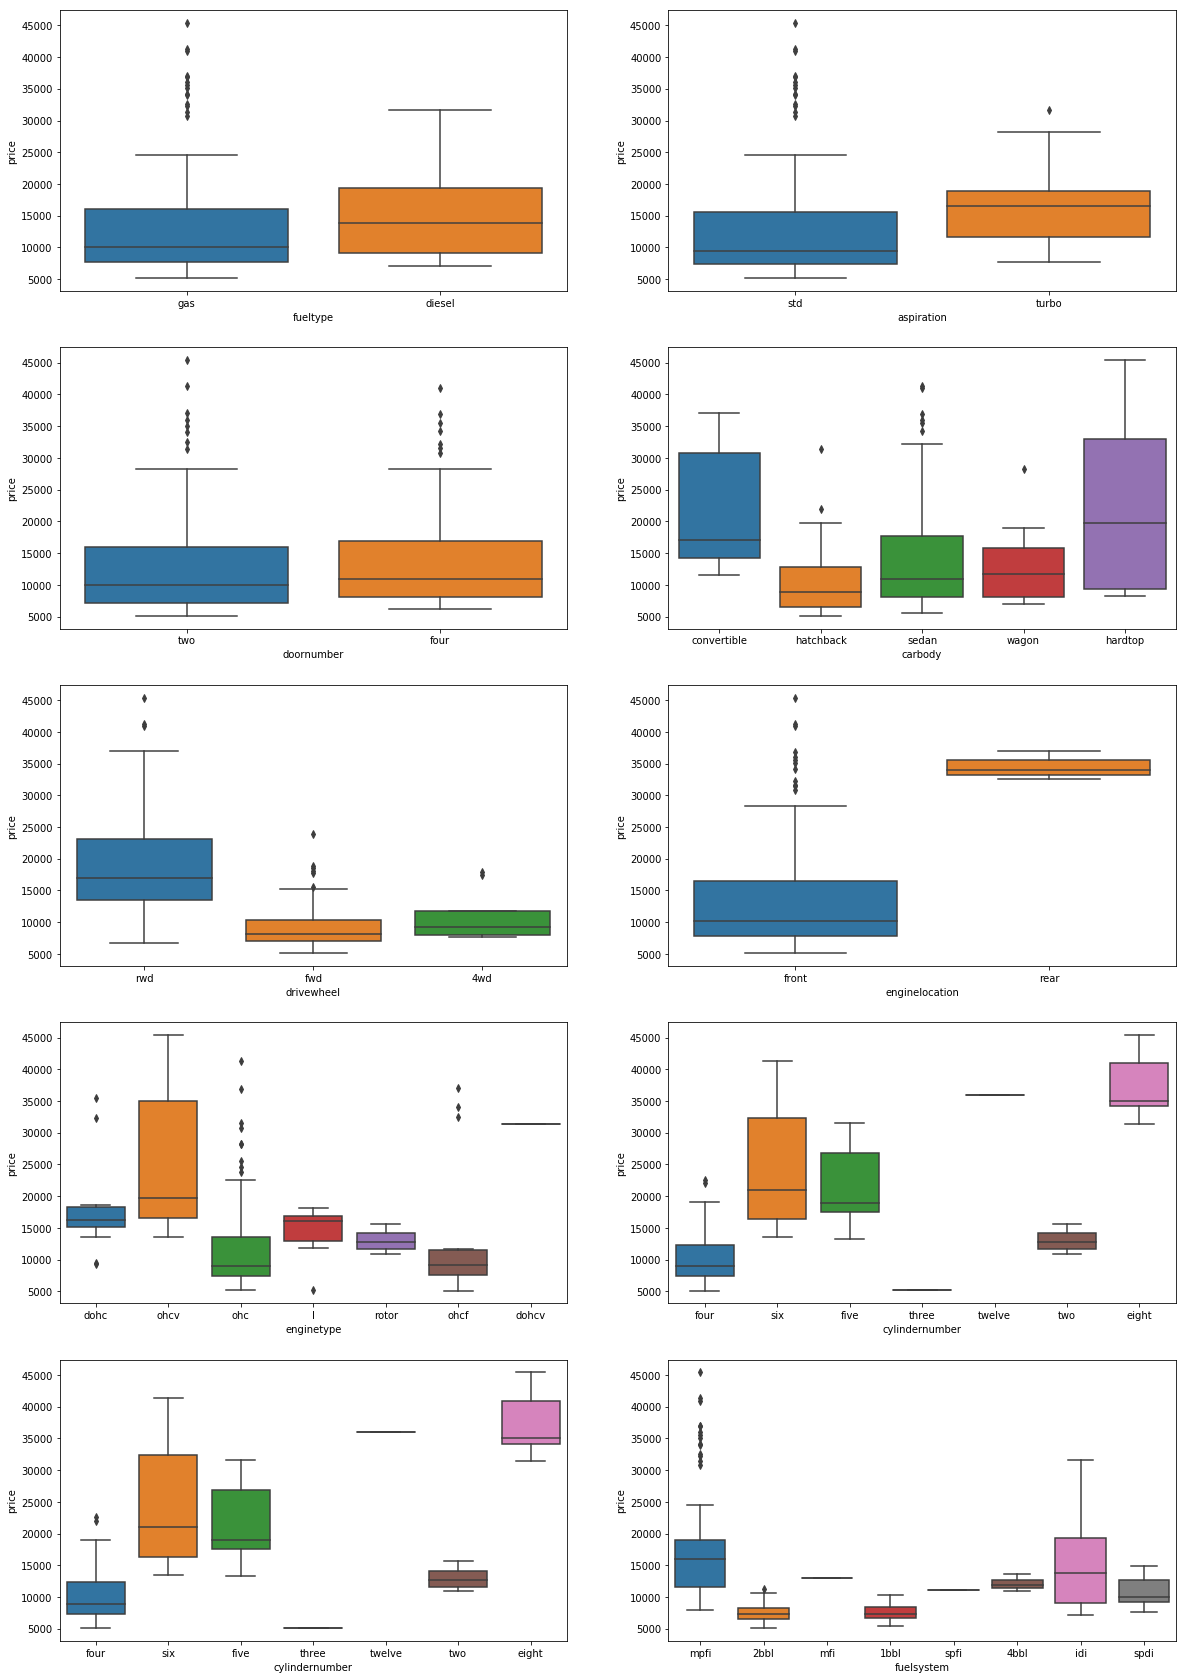

In [631]:
# Creating box plot for categorical variables

plt.figure(figsize=(20,30))
plt.subplot(5,2,1)
sns.boxplot(x='fueltype',y='price',data=cars)
plt.subplot(5,2,2)
sns.boxplot(x='aspiration',y='price',data=cars)
plt.subplot(5,2,3)
sns.boxplot(x='doornumber',y='price',data=cars)
plt.subplot(5,2,4)
sns.boxplot(x='carbody',y='price',data=cars)
plt.subplot(5,2,5)
sns.boxplot(x='drivewheel',y='price',data=cars)
plt.subplot(5,2,6)
sns.boxplot(x='enginelocation',y='price',data=cars)
plt.subplot(5,2,7)
sns.boxplot(x='enginetype',y='price',data=cars)
plt.subplot(5,2,8)
sns.boxplot(x='cylindernumber',y='price',data=cars)
plt.subplot(5,2,9)
sns.boxplot(x='cylindernumber',y='price',data=cars)
plt.subplot(5,2,10)
sns.boxplot(x='fuelsystem',y='price',data=cars)


We can also visualize the categorical variables using hue

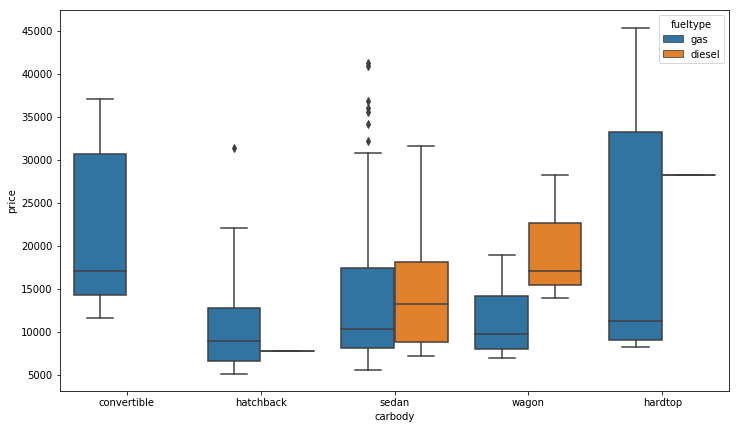

In [632]:
# Plotting for hue 'fueltype'

plt.figure(figsize=(12,7))
sns.boxplot(x='carbody',y='price',hue='fueltype',data=cars)
plt.show()

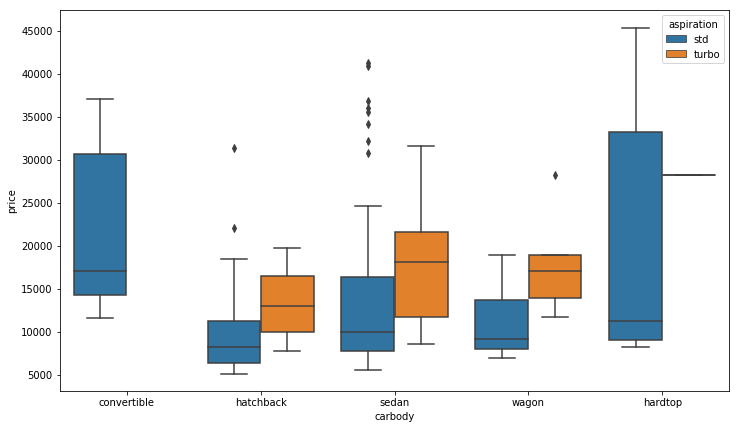

In [633]:
# PLotting for hue 'aspiration'

plt.figure(figsize=(12,7))
sns.boxplot(x='carbody',y='price',hue='aspiration',data=cars)
plt.show()

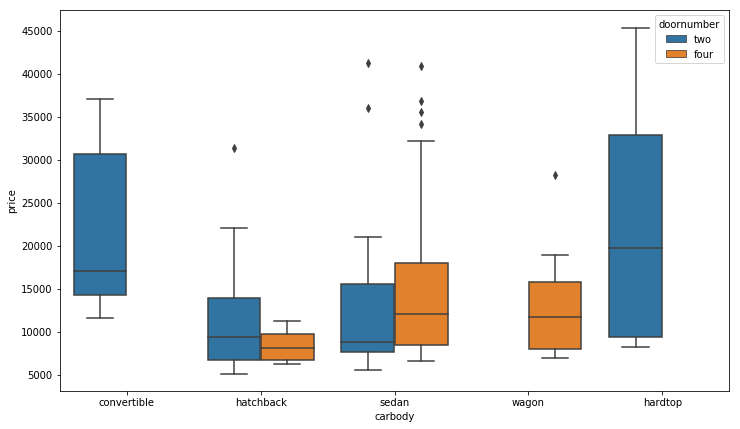

In [634]:
# Plotting for hue 'doornumber'

plt.figure(figsize=(12,7))
sns.boxplot(x='carbody',y='price',hue='doornumber',data=cars)
plt.show()

From the above all categorical visualisation we can conclude that for the predictors there are some outliers and have some intersting correlation with the traget variable.

## Step 3 : Data Preparation

In [641]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,peakrpm,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,dohc,four,130,mpfi,3.47,2.68,9.0,5000,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,dohc,four,130,mpfi,3.47,2.68,9.0,5000,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,ohcv,six,152,mpfi,2.68,3.47,9.0,5000,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,ohc,four,109,mpfi,3.19,3.40,10.0,5500,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,ohc,five,136,mpfi,3.19,3.40,8.0,5500,22,17450.0


Before creating model we need to make some change for column 'CarName', we need to consider only the name of the company's name not the model name of the car.

In [642]:
# Renaming the column 'CarName' values to company's name

cars['CarName']=cars['CarName'].apply(lambda x:x.split(" ")[0])


In [643]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,peakrpm,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,dohc,four,130,mpfi,3.47,2.68,9.0,5000,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,dohc,four,130,mpfi,3.47,2.68,9.0,5000,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,ohcv,six,152,mpfi,2.68,3.47,9.0,5000,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,ohc,four,109,mpfi,3.19,3.40,10.0,5500,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,ohc,five,136,mpfi,3.19,3.40,8.0,5500,22,17450.0


### Creating dummy variables

In [644]:
cars['symboling']=cars['symboling'].apply(lambda x:str(x))

In [645]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 21 columns):
car_ID              205 non-null int64
symboling           205 non-null object
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carheight           205 non-null float64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
peakrpm             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
dtypes: float64(6), int64(4), object(11)
memory usage

In [646]:
# Creating dummies for categorical variables

variables=['symboling','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype',
          'cylindernumber','fuelsystem']

# Creating dummies for each categorical variables and dropping first dummy variables for each categorical variables

dummies=pd.get_dummies(cars[variables],drop_first=True)     

In [647]:
# Adding these dummies into our original dataset

cars=pd.concat([cars,dummies],axis=1)

In [648]:
# Let's check our dataset after adding these dummies

cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,0,0,0,0,0,0,0,1,0,0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,0,0,0,0,0,0,0,1,0,0


In [649]:
# Now dropping the categorical variables as we have created dummies and derived columns for them and car_id.

categories=['car_ID','symboling','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation',
            'enginetype','cylindernumber','fuelsystem']

cars.drop(categories,axis=1,inplace=True)

In [650]:
cars.head()

,wheelbase,carheight,enginesize,boreratio,stroke,compressionratio,peakrpm,highwaympg,price,symboling_-2,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,48.8,130,3.47,2.68,9.0,5000,27,13495.0,0,...,0,0,0,0,0,0,0,1,0,0
1,88.6,48.8,130,3.47,2.68,9.0,5000,27,16500.0,0,...,0,0,0,0,0,0,0,1,0,0
2,94.5,52.4,152,2.68,3.47,9.0,5000,26,16500.0,0,...,0,0,0,0,0,0,0,1,0,0
3,99.8,54.3,109,3.19,3.40,10.0,5500,30,13950.0,0,...,0,0,0,0,0,0,0,1,0,0
4,99.4,54.3,136,3.19,3.40,8.0,5500,22,17450.0,0,...,0,0,0,0,0,0,0,1,0,0


## Step 4 : Splitting the dataset into Training and Test datasets

In [651]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 70 columns):
wheelbase                205 non-null float64
carheight                205 non-null float64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
peakrpm                  205 non-null int64
highwaympg               205 non-null int64
price                    205 non-null float64
symboling_-2             205 non-null uint8
symboling_0              205 non-null uint8
symboling_1              205 non-null uint8
symboling_2              205 non-null uint8
symboling_3              205 non-null uint8
CarName_alfa-romero      205 non-null uint8
CarName_audi             205 non-null uint8
CarName_bmw              205 non-null uint8
CarName_buick            205 non-null uint8
CarName_chevrolet        205 non-null uint8
CarName_dodge            205 non-null uint8
Car

In [652]:
# Import the necessary libraries to perform first step of regression i.e Train and Test split

from sklearn.model_selection import train_test_split

cars_train,cars_test=train_test_split(cars,train_size=0.7,test_size=0.3,random_state=50)

### Rescaling the datasets

Here, we will Min-Max scalling concept to rescale the train dataset

In [653]:
# importing the library for scalling with MIN-MAX

from sklearn.preprocessing import MinMaxScaler

In [654]:
# Creating object for MinMaxScaler

scaler=MinMaxScaler()

In [655]:
# Now, Applying the scaler object into the train dataset for rescalling

# We will apply this to all columns except dummy variables columns and symboling column

scalling=['wheelbase','carheight','enginesize','boreratio','stroke','compressionratio','peakrpm','highwaympg','price']

cars_train[scalling]=scaler.fit_transform(cars_train[scalling])

In [656]:
cars_train.describe()

,wheelbase,carheight,enginesize,boreratio,stroke,compressionratio,peakrpm,highwaympg,price,symboling_-2,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.416229,0.501573,0.244966,0.560290,0.559507,0.192622,0.406879,0.382775,0.204853,0.020979,...,0.006993,0.006993,0.027972,0.321678,0.020979,0.090909,0.006993,0.475524,0.027972,0.006993
std,0.206140,0.209870,0.158019,0.198244,0.143956,0.239213,0.190266,0.185049,0.198087,0.143818,...,0.083624,0.083624,0.165472,0.468762,0.143818,0.288490,0.083624,0.501156,0.165472,0.083624
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.350000,0.135849,0.428571,0.495238,0.100000,0.265306,0.236842,0.063666,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.358621,0.525000,0.218868,0.564286,0.571429,0.125000,0.428571,0.368421,0.129047,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.537931,0.654167,0.301887,0.742857,0.633333,0.150000,0.551020,0.473684,0.288864,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now, we have scalled all the columns and all are in range between 0 and 1

## Step 5  : Building a linear model

In [657]:
# importing necessary library

import statsmodels.api as sm

**Dividing the train set into X and Y sets for building a model**

In [658]:
y_train=cars_train.pop('price')
X_train=cars_train

In [659]:
# We have y_train 

y_train.head()

77     0.025789
153    0.043902
143    0.119481
57     0.211036
131    0.117866
Name: price, dtype: float64

In [660]:
# and X_train 

X_train.head()

,wheelbase,carheight,enginesize,boreratio,stroke,compressionratio,peakrpm,highwaympg,symboling_-2,symboling_0,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
77,0.244828,0.250000,0.116981,0.307143,0.552381,0.15000,0.551020,0.578947,0,0,...,0,0,0,1,0,0,0,0,0,0
153,0.313793,0.941667,0.116981,0.364286,0.457143,0.12500,0.265306,0.552632,0,1,...,0,0,0,1,0,0,0,0,0,0
143,0.365517,0.391667,0.177358,0.771429,0.271429,0.12500,0.428571,0.421053,0,1,...,0,0,0,0,0,0,0,1,0,0
57,0.300000,0.150000,0.033962,0.564286,0.564286,0.15000,0.755102,0.184211,0,0,...,0,0,1,0,1,0,0,0,0,0
131,0.327586,0.225000,0.267925,0.657143,0.871429,0.10625,0.387755,0.394737,0,0,...,0,0,0,0,0,0,0,1,0,0


### Building our model using RFE(Recursive feature elimination)

In [661]:
# Importing RFE and linearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [662]:
# Running RFE with taking output variable equal to 10

lm=LinearRegression()   # creating object

lm.fit(X_train,y_train)

rfe=RFE(lm,20)          # Creating RFE with 20 variable

rfe=rfe.fit(X_train,y_train)

In [663]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))  # Checking the rfe rank and rfe support

[('wheelbase', True, 1),
 ('carheight', False, 43),
 ('enginesize', True, 1),
 ('boreratio', False, 2),
 ('stroke', True, 1),
 ('compressionratio', False, 42),
 ('peakrpm', True, 1),
 ('highwaympg', False, 9),
 ('symboling_-2', False, 4),
 ('symboling_0', False, 49),
 ('symboling_1', False, 50),
 ('symboling_2', False, 45),
 ('symboling_3', False, 47),
 ('CarName_alfa-romero', False, 8),
 ('CarName_audi', True, 1),
 ('CarName_bmw', True, 1),
 ('CarName_buick', True, 1),
 ('CarName_chevrolet', False, 23),
 ('CarName_dodge', False, 22),
 ('CarName_honda', False, 15),
 ('CarName_isuzu', False, 31),
 ('CarName_jaguar', False, 33),
 ('CarName_maxda', False, 29),
 ('CarName_mazda', False, 11),
 ('CarName_mercury', False, 32),
 ('CarName_mitsubishi', False, 21),
 ('CarName_nissan', False, 27),
 ('CarName_peugeot', False, 34),
 ('CarName_plymouth', False, 24),
 ('CarName_porcshce', False, 38),
 ('CarName_porsche', True, 1),
 ('CarName_renault', False, 19),
 ('CarName_saab', True, 1),
 ('CarNam

In [664]:
# Creating columns dataset for 'True' rfe_support

col=X_train.columns[rfe.support_]
col

Index(['wheelbase', 'enginesize', 'stroke', 'peakrpm', 'CarName_audi',
       'CarName_bmw', 'CarName_buick', 'CarName_porsche', 'CarName_saab',
       'CarName_volvo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'enginelocation_rear',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_two'],
      dtype='object')

**We will use statsmodel to build our model**

In [665]:
# Creating new X dataset after applying rfe

X_train_rfe=X_train[col]

In [666]:
# Creating constant and running linear model

X_train_const=sm.add_constant(X_train_rfe)

lm=sm.OLS(y_train,X_train_const).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     117.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.06e-69
Time:                        00:14:35   Log-Likelihood:                 240.32
No. Observations:                 143   AIC:                            -440.6
Df Residuals:                     123   BIC:                            -381.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0555      0.043      1.279      0.203      -0.030       0.141
wheelbase               0.1705      0.036      4.681      0.000       0.098       0.243
enginesize              0.7581      0.061     12.508      0.000       0.638       0.878
stroke                 -0.0510      0.033     -1.540      0.126      -0.116       0.015
peakrpm                 0.0585      0.028      2.070      0.041       0.003       0.114
CarName_audi            0.1011      0.032      3.208      0.002       0.039       0.163
CarName_bmw             0.1570      0.028      5.704      0.000       0.102       0.211
CarName_buick           0.2210      0.031      7.178      0.000       0.160       0.282
CarName_porsche         0.1949      0.040      4.921      0.000       0.116       0.273
CarName_saab            0.0849      0.024      3.503      0.001       0.037       0.133
CarName_volvo           0.0717      0.020      3.572      0.001       0.032       0.111
carbody_hardtop        -0.1057      0.037     -2.876      0.005      -0.178      -0.033
carbody_hatchback      -0.0811      0.027     -3.044      0.003      -0.134      -0.028
carbody_sedan          -0.0763      0.027     -2.846      0.005      -0.129      -0.023
carbody_wagon          -0.0965      0.029     -3.317      0.001      -0.154      -0.039
enginelocation_rear     0.1380      0.056      2.445      0.016       0.026       0.250
enginetype_ohcv        -0.0714      0.029     -2.431      0.017      -0.130      -0.013
enginetype_rotor        0.0608      0.019      3.242      0.002       0.024       0.098
cylindernumber_five    -0.0745      0.036     -2.093      0.038      -0.145      -0.004
cylindernumber_four    -0.0668      0.023     -2.876      0.005      -0.113      -0.021
cylindernumber_two      0.0608      0.019      3.242      0.002       0.024       0.098
==============================================================================
Omnibus:                        1.538   Durbin-Watson:                   2.404
Prob(Omnibus):                  0.463   Jarque-Bera (JB):                1.142
Skew:                           0.057   Prob(JB):                        0.565
Kurtosis:                       3.423   Cond. No.                     6.60e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.86e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Creating VIF

In [667]:
# Creating VIF

X_train_new=X_train_const.drop(['const'],axis=1)   # dropping constant

vif=pd.DataFrame()
X=X_train_new
vif['Predictors']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Predictors,VIF
19,cylindernumber_two,inf
16,enginetype_rotor,inf
2,stroke,19.84
0,wheelbase,17.31
1,enginesize,16.20
18,cylindernumber_four,14.06
12,carbody_sedan,13.58
11,carbody_hatchback,10.19
3,peakrpm,8.98
13,carbody_wagon,5.31


**After RFE, we will remove one by variable manually from the model to get the acceptable range for p-value and VIF.**

In [668]:
X=X.drop(['stroke'],1)   # dropping the insignificant variable

# Creating constant  

X=sm.add_constant(X)

# Creating linear model

lm1=sm.OLS(y_train,X).fit()

lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     122.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.85e-70
Time:                        00:14:38   Log-Likelihood:                 238.95
No. Observations:                 143   AIC:                            -439.9
Df Residuals:                     124   BIC:                            -383.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0340      0.041      0.823      0.412      -0.048       0.116
wheelbase               0.1687      0.037      4.608      0.000       0.096       0.241
enginesize              0.7344      0.059     12.459      0.000       0.618       0.851
peakrpm                 0.0543      0.028      1.919      0.057      -0.002       0.110
CarName_audi            0.1026      0.032      3.241      0.002       0.040       0.165
CarName_bmw             0.1669      0.027      6.206      0.000       0.114       0.220
CarName_buick           0.2222      0.031      7.182      0.000       0.161       0.283
CarName_porsche         0.2077      0.039      5.335      0.000       0.131       0.285
CarName_saab            0.0967      0.023      4.181      0.000       0.051       0.142
CarName_volvo           0.0770      0.020      3.868      0.000       0.038       0.116
carbody_hardtop        -0.1077      0.037     -2.917      0.004      -0.181      -0.035
carbody_hatchback      -0.0851      0.027     -3.194      0.002      -0.138      -0.032
carbody_sedan          -0.0790      0.027     -2.937      0.004      -0.132      -0.026
carbody_wagon          -0.0977      0.029     -3.343      0.001      -0.156      -0.040
enginelocation_rear     0.1426      0.057      2.517      0.013       0.030       0.255
enginetype_ohcv        -0.0591      0.028     -2.078      0.040      -0.115      -0.003
enginetype_rotor        0.0616      0.019      3.267      0.001       0.024       0.099
cylindernumber_five    -0.0751      0.036     -2.099      0.038      -0.146      -0.004
cylindernumber_four    -0.0648      0.023     -2.779      0.006      -0.111      -0.019
cylindernumber_two      0.0616      0.019      3.267      0.001       0.024       0.099
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.468
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.500
Skew:                          -0.016   Prob(JB):                        0.779
Kurtosis:                       3.288   Cond. No.                     9.07e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.16e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Creating VIF

In [669]:
# Creating VIF

X=X.drop(['const'],1)
vif=pd.DataFrame()
vif['Predictors']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Predictors,VIF
18,cylindernumber_two,inf
15,enginetype_rotor,inf
0,wheelbase,17.28
17,cylindernumber_four,13.39
1,enginesize,13.25
11,carbody_sedan,12.31
10,carbody_hatchback,8.81
2,peakrpm,8.60
12,carbody_wagon,5.02
16,cylindernumber_five,4.46


In [670]:
X=X.drop(['peakrpm'],1)      # dropping insignificant and correlated variable

# Creating constant 

X=sm.add_constant(X)

# Creating linear model

lm2=sm.OLS(y_train,X).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     127.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.09e-70
Time:                        00:14:40   Log-Likelihood:                 236.86
No. Observations:                 143   AIC:                            -437.7
Df Residuals:                     125   BIC:                            -384.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0602      0.039      1.528      0.129      -0.018       0.138
wheelbase               0.1499      0.036      4.205      0.000       0.079       0.220
enginesize              0.7246      0.059     12.209      0.000       0.607       0.842
CarName_audi            0.1129      0.032      3.580      0.000       0.050       0.175
CarName_bmw             0.1795      0.026      6.809      0.000       0.127       0.232
CarName_buick           0.2178      0.031      6.983      0.000       0.156       0.279
CarName_porsche         0.2223      0.039      5.759      0.000       0.146       0.299
CarName_saab            0.1044      0.023      4.532      0.000       0.059       0.150
CarName_volvo           0.0880      0.019      4.567      0.000       0.050       0.126
carbody_hardtop        -0.1069      0.037     -2.865      0.005      -0.181      -0.033
carbody_hatchback      -0.0832      0.027     -3.090      0.002      -0.136      -0.030
carbody_sedan          -0.0773      0.027     -2.844      0.005      -0.131      -0.024
carbody_wagon          -0.0961      0.030     -3.255      0.001      -0.155      -0.038
enginelocation_rear     0.1470      0.057      2.569      0.011       0.034       0.260
enginetype_ohcv        -0.0518      0.028     -1.821      0.071      -0.108       0.005
enginetype_rotor        0.0710      0.018      3.860      0.000       0.035       0.107
cylindernumber_five    -0.0705      0.036     -1.954      0.053      -0.142       0.001
cylindernumber_four    -0.0636      0.024     -2.701      0.008      -0.110      -0.017
cylindernumber_two      0.0710      0.018      3.860      0.000       0.035       0.107
==============================================================================
Omnibus:                        0.376   Durbin-Watson:                   2.477
Prob(Omnibus):                  0.829   Jarque-Bera (JB):                0.113
Skew:                          -0.010   Prob(JB):                        0.945
Kurtosis:                       3.136   Cond. No.                     4.93e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.31e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Creating VIF

In [671]:
# Creating VIF

X=X.drop(['const'],1)
vif=pd.DataFrame()
vif['Predictors']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Predictors,VIF
17,cylindernumber_two,inf
14,enginetype_rotor,inf
0,wheelbase,15.96
1,enginesize,13.13
16,cylindernumber_four,11.64
10,carbody_sedan,11.13
9,carbody_hatchback,7.72
11,carbody_wagon,4.67
15,cylindernumber_five,4.33
13,enginetype_ohcv,3.37


In [672]:
X=X.drop(['enginetype_ohcv'],1)    # dropping highly insignificant variable

# Creating constant

X=sm.add_constant(X)

# Creating linear model

lm3=sm.OLS(y_train,X).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     132.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.34e-70
Time:                        00:14:42   Log-Likelihood:                 234.99
No. Observations:                 143   AIC:                            -436.0
Df Residuals:                     126   BIC:                            -385.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0401      0.038      1.052      0.295      -0.035       0.116
wheelbase               0.1695      0.034      4.939      0.000       0.102       0.237
enginesize              0.6896      0.057     12.170      0.000       0.577       0.802
CarName_audi            0.1052      0.032      3.335      0.001       0.043       0.168
CarName_bmw             0.1961      0.025      7.853      0.000       0.147       0.245
CarName_buick           0.2041      0.031      6.682      0.000       0.144       0.265
CarName_porsche         0.2431      0.037      6.533      0.000       0.169       0.317
CarName_saab            0.1047      0.023      4.504      0.000       0.059       0.151
CarName_volvo           0.0865      0.019      4.453      0.000       0.048       0.125
carbody_hardtop        -0.1081      0.038     -2.872      0.005      -0.183      -0.034
carbody_hatchback      -0.0868      0.027     -3.205      0.002      -0.140      -0.033
carbody_sedan          -0.0817      0.027     -2.991      0.003      -0.136      -0.028
carbody_wagon          -0.1025      0.030     -3.465      0.001      -0.161      -0.044
enginelocation_rear     0.1625      0.057      2.845      0.005       0.049       0.276
enginetype_rotor        0.0807      0.018      4.541      0.000       0.046       0.116
cylindernumber_five    -0.0374      0.031     -1.190      0.236      -0.100       0.025
cylindernumber_four    -0.0404      0.020     -2.022      0.045      -0.080      -0.001
cylindernumber_two      0.0807      0.018      4.541      0.000       0.046       0.116
==============================================================================
Omnibus:                        1.014   Durbin-Watson:                   2.395
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                0.616
Skew:                          -0.091   Prob(JB):                        0.735
Kurtosis:                       3.264   Cond. No.                     3.57e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.5e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Creating VIF

In [673]:
# Creating VIF

X=X.drop(['const'],1)
vif=pd.DataFrame()
vif['Predictors']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Predictors,VIF
16,cylindernumber_two,inf
13,enginetype_rotor,inf
0,wheelbase,14.16
10,carbody_sedan,9.58
1,enginesize,9.04
15,cylindernumber_four,8.58
9,carbody_hatchback,6.52
11,carbody_wagon,4.04
14,cylindernumber_five,3.43
2,CarName_audi,2.36


In [674]:
X=X.drop(['cylindernumber_five'],1)                   # dropping insignificant variable

# Creating constant 

X=sm.add_constant(X)

# Creating linear model

lm4=sm.OLS(y_train,X).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     140.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.23e-71
Time:                        00:14:44   Log-Likelihood:                 234.19
No. Observations:                 143   AIC:                            -436.4
Df Residuals:                     127   BIC:                            -389.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0307      0.037      0.820      0.414      -0.043       0.105
wheelbase               0.1613      0.034      4.790      0.000       0.095       0.228
enginesize              0.7137      0.053     13.455      0.000       0.609       0.819
CarName_audi            0.0819      0.025      3.306      0.001       0.033       0.131
CarName_bmw             0.1998      0.025      8.048      0.000       0.151       0.249
CarName_buick           0.1882      0.028      6.843      0.000       0.134       0.243
CarName_porsche         0.2414      0.037      6.482      0.000       0.168       0.315
CarName_saab            0.1041      0.023      4.473      0.000       0.058       0.150
CarName_volvo           0.0887      0.019      4.580      0.000       0.050       0.127
carbody_hardtop        -0.1059      0.038     -2.811      0.006      -0.180      -0.031
carbody_hatchback      -0.0884      0.027     -3.261      0.001      -0.142      -0.035
carbody_sedan          -0.0839      0.027     -3.076      0.003      -0.138      -0.030
carbody_wagon          -0.1049      0.030     -3.547      0.001      -0.163      -0.046
enginelocation_rear     0.1613      0.057      2.820      0.006       0.048       0.275
enginetype_rotor        0.0869      0.017      5.109      0.000       0.053       0.121
cylindernumber_four    -0.0304      0.018     -1.675      0.096      -0.066       0.006
cylindernumber_two      0.0869      0.017      5.109      0.000       0.053       0.121
==============================================================================
Omnibus:                        0.908   Durbin-Watson:                   2.419
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.521
Skew:                          -0.073   Prob(JB):                        0.771
Kurtosis:                       3.257   Cond. No.                     3.57e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.5e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Creating VIF

In [675]:
# Creating VIF

X=X.drop(['const'],1)
vif=pd.DataFrame()
vif['Predictors']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Predictors,VIF
13,enginetype_rotor,inf
15,cylindernumber_two,inf
0,wheelbase,13.74
10,carbody_sedan,8.64
1,enginesize,8.24
14,cylindernumber_four,7.24
9,carbody_hatchback,5.85
11,carbody_wagon,3.73
12,enginelocation_rear,2.30
5,CarName_porsche,2.21


In [676]:
X=X.drop(['cylindernumber_four'],1)        # from insignificant variable

# Creating constant 

X=sm.add_constant(X)

# Creating linear model

lm5=sm.OLS(y_train,X).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     148.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           7.13e-72
Time:                        00:14:46   Log-Likelihood:                 232.62
No. Observations:                 143   AIC:                            -435.2
Df Residuals:                     128   BIC:                            -390.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0136      0.027     -0.508      0.612      -0.066       0.039
wheelbase               0.1491      0.033      4.503      0.000       0.084       0.215
enginesize              0.7721      0.040     19.185      0.000       0.692       0.852
CarName_audi            0.1028      0.022      4.773      0.000       0.060       0.145
CarName_bmw             0.2083      0.024      8.519      0.000       0.160       0.257
CarName_buick           0.2020      0.026      7.645      0.000       0.150       0.254
CarName_porsche         0.2386      0.037      6.370      0.000       0.165       0.313
CarName_saab            0.1001      0.023      4.295      0.000       0.054       0.146
CarName_volvo           0.0906      0.019      4.655      0.000       0.052       0.129
carbody_hardtop        -0.1108      0.038     -2.931      0.004      -0.186      -0.036
carbody_hatchback      -0.0781      0.027     -2.937      0.004      -0.131      -0.025
carbody_sedan          -0.0749      0.027     -2.781      0.006      -0.128      -0.022
carbody_wagon          -0.0959      0.029     -3.275      0.001      -0.154      -0.038
enginelocation_rear     0.1826      0.056      3.252      0.001       0.072       0.294
enginetype_rotor        0.1045      0.014      7.730      0.000       0.078       0.131
cylindernumber_two      0.1045      0.014      7.730      0.000       0.078       0.131
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   2.379
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.038
Skew:                          -0.029   Prob(JB):                        0.981
Kurtosis:                       3.056   Cond. No.                     3.03e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.51e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Creating VIF

In [677]:
# Creating VIF

X=X.drop(['const'],1)
vif=pd.DataFrame()
vif['Predictors']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Predictors,VIF
13,enginetype_rotor,inf
14,cylindernumber_two,inf
0,wheelbase,13.35
1,enginesize,7.01
10,carbody_sedan,4.59
9,carbody_hatchback,2.69
11,carbody_wagon,2.46
12,enginelocation_rear,2.29
5,CarName_porsche,2.21
4,CarName_buick,1.66


In [678]:
X=X.drop(['enginetype_rotor'],1)       # dropping overfitting variable

# Creating constant

X=sm.add_constant(X)

# Creating linear model

lm6=sm.OLS(y_train,X).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     148.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           7.13e-72
Time:                        00:14:48   Log-Likelihood:                 232.62
No. Observations:                 143   AIC:                            -435.2
Df Residuals:                     128   BIC:                            -390.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0136      0.027     -0.508      0.612      -0.066       0.039
wheelbase               0.1491      0.033      4.503      0.000       0.084       0.215
enginesize              0.7721      0.040     19.185      0.000       0.692       0.852
CarName_audi            0.1028      0.022      4.773      0.000       0.060       0.145
CarName_bmw             0.2083      0.024      8.519      0.000       0.160       0.257
CarName_buick           0.2020      0.026      7.645      0.000       0.150       0.254
CarName_porsche         0.2386      0.037      6.370      0.000       0.165       0.313
CarName_saab            0.1001      0.023      4.295      0.000       0.054       0.146
CarName_volvo           0.0906      0.019      4.655      0.000       0.052       0.129
carbody_hardtop        -0.1108      0.038     -2.931      0.004      -0.186      -0.036
carbody_hatchback      -0.0781      0.027     -2.937      0.004      -0.131      -0.025
carbody_sedan          -0.0749      0.027     -2.781      0.006      -0.128      -0.022
carbody_wagon          -0.0959      0.029     -3.275      0.001      -0.154      -0.038
enginelocation_rear     0.1826      0.056      3.252      0.001       0.072       0.294
cylindernumber_two      0.2089      0.027      7.730      0.000       0.155       0.262
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   2.379
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.038
Skew:                          -0.029   Prob(JB):                        0.981
Kurtosis:                       3.056   Cond. No.                         19.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Creating VIF

In [679]:
# Creating VIF

X=X.drop(['const'],1)
vif=pd.DataFrame()
vif['Predictors']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Predictors,VIF
0,wheelbase,13.35
1,enginesize,7.01
10,carbody_sedan,4.59
9,carbody_hatchback,2.69
11,carbody_wagon,2.46
12,enginelocation_rear,2.29
5,CarName_porsche,2.21
4,CarName_buick,1.66
8,carbody_hardtop,1.45
7,CarName_volvo,1.35


In [680]:
X=X.drop(['wheelbase'],1)       # dropping highly correlated variable

# Creating constant

X=sm.add_constant(X)

# Creating linear model

lm7=sm.OLS(y_train,X).fit()
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     137.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.87e-69
Time:                        00:14:51   Log-Likelihood:                 222.11
No. Observations:                 143   AIC:                            -416.2
Df Residuals:                     129   BIC:                            -374.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0110      0.029     -0.384      0.702      -0.068       0.046
enginesize              0.8624      0.037     23.053      0.000       0.788       0.936
CarName_audi            0.1162      0.023      5.078      0.000       0.071       0.161
CarName_bmw             0.2226      0.026      8.561      0.000       0.171       0.274
CarName_buick           0.2350      0.027      8.635      0.000       0.181       0.289
CarName_porsche         0.2235      0.040      5.587      0.000       0.144       0.303
CarName_saab            0.1118      0.025      4.501      0.000       0.063       0.161
CarName_volvo           0.1212      0.020      6.200      0.000       0.083       0.160
carbody_hardtop        -0.0943      0.040     -2.338      0.021      -0.174      -0.015
carbody_hatchback      -0.0544      0.028     -1.948      0.054      -0.110       0.001
carbody_sedan          -0.0365      0.027     -1.334      0.185      -0.091       0.018
carbody_wagon          -0.0461      0.029     -1.586      0.115      -0.104       0.011
enginelocation_rear     0.1565      0.060      2.614      0.010       0.038       0.275
cylindernumber_two      0.2235      0.029      7.768      0.000       0.167       0.280
==============================================================================
Omnibus:                        3.322   Durbin-Watson:                   2.243
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.942
Skew:                           0.232   Prob(JB):                        0.230
Kurtosis:                       3.528   Cond. No.                         18.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Creating VIF

In [681]:
# Creating VIF

X=X.drop(['const'],1)
vif=pd.DataFrame()
vif['Predictors']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Predictors,VIF
0,enginesize,5.03
9,carbody_sedan,2.52
11,enginelocation_rear,2.27
4,CarName_porsche,2.19
8,carbody_hatchback,2.02
3,CarName_buick,1.53
7,carbody_hardtop,1.43
10,carbody_wagon,1.40
6,CarName_volvo,1.18
2,CarName_bmw,1.16


In [682]:
X=X.drop(['carbody_sedan'],1)    # dropping insignificant variable

# Creating constant 

X=sm.add_constant(X)

# Creating linear model

lm8=sm.OLS(y_train,X).fit()
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     148.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.33e-69
Time:                        00:14:53   Log-Likelihood:                 221.13
No. Observations:                 143   AIC:                            -416.3
Df Residuals:                     130   BIC:                            -377.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0461      0.011     -4.115      0.000      -0.068      -0.024
enginesize              0.8671      0.037     23.214      0.000       0.793       0.941
CarName_audi            0.1143      0.023      4.990      0.000       0.069       0.160
CarName_bmw             0.2194      0.026      8.449      0.000       0.168       0.271
CarName_buick           0.2393      0.027      8.829      0.000       0.186       0.293
CarName_porsche         0.2223      0.040      5.541      0.000       0.143       0.302
CarName_saab            0.1106      0.025      4.444      0.000       0.061       0.160
CarName_volvo           0.1189      0.020      6.086      0.000       0.080       0.158
carbody_hardtop        -0.0703      0.036     -1.942      0.054      -0.142       0.001
carbody_hatchback      -0.0201      0.011     -1.831      0.069      -0.042       0.002
carbody_wagon          -0.0120      0.014     -0.865      0.388      -0.040       0.015
enginelocation_rear     0.1785      0.058      3.090      0.002       0.064       0.293
cylindernumber_two      0.2241      0.029      7.767      0.000       0.167       0.281
==============================================================================
Omnibus:                        2.328   Durbin-Watson:                   2.261
Prob(Omnibus):                  0.312   Jarque-Bera (JB):                1.878
Skew:                           0.182   Prob(JB):                        0.391
Kurtosis:                       3.428   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Creating VIF

In [683]:
# Creating VIF

X=X.drop(['const'],1)
vif=pd.DataFrame()
vif['Predictors']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Predictors,VIF
0,enginesize,2.66
10,enginelocation_rear,2.27
4,CarName_porsche,2.15
8,carbody_hatchback,1.58
3,CarName_buick,1.44
7,carbody_hardtop,1.34
9,carbody_wagon,1.18
6,CarName_volvo,1.17
2,CarName_bmw,1.15
11,cylindernumber_two,1.11


In [684]:
X=X.drop(['carbody_wagon'],1)     # Dropping insignificant variable

# Creating constant 

X=sm.add_constant(X)

# Creating linear model

lm9=sm.OLS(y_train,X).fit()
lm9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     161.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.47e-70
Time:                        00:14:55   Log-Likelihood:                 220.72
No. Observations:                 143   AIC:                            -417.4
Df Residuals:                     131   BIC:                            -381.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0493      0.011     -4.675      0.000      -0.070      -0.028
enginesize              0.8680      0.037     23.271      0.000       0.794       0.942
CarName_audi            0.1148      0.023      5.017      0.000       0.070       0.160
CarName_bmw             0.2222      0.026      8.639      0.000       0.171       0.273
CarName_buick           0.2397      0.027      8.851      0.000       0.186       0.293
CarName_porsche         0.2221      0.040      5.543      0.000       0.143       0.301
CarName_saab            0.1119      0.025      4.506      0.000       0.063       0.161
CarName_volvo           0.1191      0.020      6.107      0.000       0.081       0.158
carbody_hardtop        -0.0683      0.036     -1.893      0.061      -0.140       0.003
carbody_hatchback      -0.0172      0.010     -1.645      0.102      -0.038       0.003
enginelocation_rear     0.1804      0.058      3.128      0.002       0.066       0.294
cylindernumber_two      0.2243      0.029      7.783      0.000       0.167       0.281
==============================================================================
Omnibus:                        2.800   Durbin-Watson:                   2.242
Prob(Omnibus):                  0.247   Jarque-Bera (JB):                2.359
Skew:                           0.212   Prob(JB):                        0.307
Kurtosis:                       3.465   Cond. No.                         16.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Creating VIF

In [685]:
# Creating VIF

X=X.drop(['const'],1)
vif=pd.DataFrame()
vif['Predictors']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Predictors,VIF
0,enginesize,2.35
9,enginelocation_rear,2.27
4,CarName_porsche,2.14
8,carbody_hatchback,1.54
3,CarName_buick,1.43
7,carbody_hardtop,1.33
6,CarName_volvo,1.17
2,CarName_bmw,1.13
10,cylindernumber_two,1.11
1,CarName_audi,1.07


In [686]:
X=X.drop(['carbody_hatchback'],1)               # dropping insignificant variable

# Creating constant

X=sm.add_constant(X)

# Creating linear model

lm10=sm.OLS(y_train,X).fit()
lm10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     175.4
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.11e-71
Time:                        00:14:57   Log-Likelihood:                 219.26
No. Observations:                 143   AIC:                            -416.5
Df Residuals:                     132   BIC:                            -383.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0570      0.010     -5.990      0.000      -0.076      -0.038
enginesize              0.8722      0.037     23.287      0.000       0.798       0.946
CarName_audi            0.1185      0.023      5.172      0.000       0.073       0.164
CarName_bmw             0.2284      0.026      8.915      0.000       0.178       0.279
CarName_buick           0.2445      0.027      9.024      0.000       0.191       0.298
CarName_porsche         0.2108      0.040      5.306      0.000       0.132       0.289
CarName_saab            0.1083      0.025      4.351      0.000       0.059       0.158
CarName_volvo           0.1255      0.019      6.525      0.000       0.087       0.164
carbody_hardtop        -0.0662      0.036     -1.822      0.071      -0.138       0.006
enginelocation_rear     0.1962      0.057      3.430      0.001       0.083       0.309
cylindernumber_two      0.2146      0.028      7.559      0.000       0.158       0.271
==============================================================================
Omnibus:                        4.583   Durbin-Watson:                   2.233
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                4.111
Skew:                           0.339   Prob(JB):                        0.128
Kurtosis:                       3.480   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Creating VIF

In [687]:
# Creating VIF

X1=X
vif=pd.DataFrame()
X1=X1.drop(['const'],1)
vif['Predictors']=X1.columns
vif['VIF']=[variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Predictors,VIF
8,enginelocation_rear,2.22
4,CarName_porsche,2.11
0,enginesize,1.82
3,CarName_buick,1.35
7,carbody_hardtop,1.32
6,CarName_volvo,1.13
2,CarName_bmw,1.10
1,CarName_audi,1.06
5,CarName_saab,1.04
9,cylindernumber_two,1.00


In [688]:
X=X.drop(['carbody_hardtop'],1)               # dropping insignificant variable

# Creating constant

X=sm.add_constant(X)

# Creating linear model

lm11=sm.OLS(y_train,X).fit()
lm11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     191.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.47e-71
Time:                        00:14:59   Log-Likelihood:                 217.48
No. Observations:                 143   AIC:                            -415.0
Df Residuals:                     133   BIC:                            -385.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0549      0.010     -5.762      0.000      -0.074      -0.036
enginesize              0.8593      0.037     23.162      0.000       0.786       0.933
CarName_audi            0.1198      0.023      5.186      0.000       0.074       0.165
CarName_bmw             0.2311      0.026      8.958      0.000       0.180       0.282
CarName_buick           0.2391      0.027      8.802      0.000       0.185       0.293
CarName_porsche         0.2143      0.040      5.355      0.000       0.135       0.294
CarName_saab            0.1091      0.025      4.347      0.000       0.059       0.159
CarName_volvo           0.1274      0.019      6.575      0.000       0.089       0.166
enginelocation_rear     0.1640      0.055      2.988      0.003       0.055       0.273
cylindernumber_two      0.2131      0.029      7.444      0.000       0.156       0.270
==============================================================================
Omnibus:                        4.252   Durbin-Watson:                   2.210
Prob(Omnibus):                  0.119   Jarque-Bera (JB):                3.992
Skew:                           0.275   Prob(JB):                        0.136
Kurtosis:                       3.607   Cond. No.                         14.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [689]:
X3=X
X3=X3.drop(['const'],1)

vif=pd.DataFrame()
vif['Predictors']=X3.columns
vif['VIF']=[variance_inflation_factor(X3.values,i) for i in range(X3.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif


,Predictors,VIF
4,CarName_porsche,2.11
7,enginelocation_rear,2.00
0,enginesize,1.77
3,CarName_buick,1.32
6,CarName_volvo,1.12
2,CarName_bmw,1.10
1,CarName_audi,1.06
5,CarName_saab,1.04
8,cylindernumber_two,1.00


We can see from the above linear model summary and VIF that all variable are in the acceptable range.

So, we will use **lm11** as our final model to make our prediction.

## Step 6 : Residual analysis

In [690]:
y_train_rfe_price=lm11.predict(X)    # predicting the train set

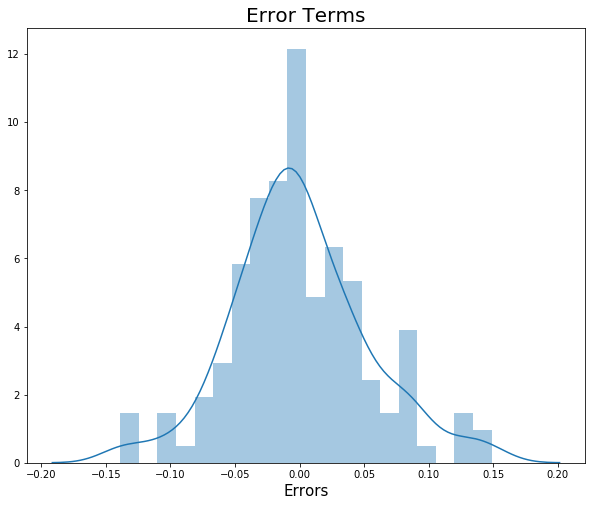

In [691]:
# Plotting histogram

plt.figure(figsize=(10,8))                         # setting figure size
sns.distplot((y_train-y_train_rfe_price),bins=20)  # Plotting
plt.title('Error Terms',fontsize=20)               # setting title
plt.xlabel('Errors',fontsize=15)                   # setting x-label
plt.show()                            

In [692]:
# Calculating the r-squared score

from sklearn.metrics import r2_score

r2_score(y_train, y_train_rfe_price)

0.9282417673934777

The r-squared score for train set is **0.928**

## Step 7 : Making predictions

In [693]:
y_test.head()          # scalling is already been done from method 1 for y-test

113    0.286815
170    0.150265
12     0.393028
73     0.889687
145    0.151755
Name: price, dtype: float64

In [694]:
X_test.head()         # scalling is already been done from method 1 for x-test

,wheelbase,carheight,enginesize,boreratio,stroke,compressionratio,peakrpm,highwaympg,symboling_-2,symboling_0,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
113,0.951724,0.741667,0.222642,0.657143,0.057143,0.08750,0.346939,0.210526,0,1,...,0,0,0,0,0,0,0,1,0,0
170,0.406897,0.350000,0.320755,0.771429,0.680952,0.14375,0.265306,0.368421,0,0,...,0,0,0,0,0,0,0,1,0,0
12,0.503448,0.541667,0.388679,0.550000,0.533333,0.12500,0.040816,0.315789,0,1,...,0,0,0,0,0,0,0,1,0,0
73,1.182759,0.741667,0.932075,0.900000,0.609524,0.06250,0.142857,0.000000,0,1,...,0,0,0,0,0,0,0,1,0,0
145,0.358621,0.541667,0.177358,0.771429,0.271429,0.04375,0.265306,0.342105,0,1,...,0,0,0,0,0,0,0,1,0,0


In [695]:
# Applying scaling on the test sets

scaling=['wheelbase','carheight','enginesize','boreratio','stroke','compressionratio','peakrpm','highwaympg','price']

cars_test[scaling]=scaler.transform(cars_test[scaling])

cars_test.describe()

,wheelbase,carheight,enginesize,boreratio,stroke,compressionratio,peakrpm,highwaympg,price,symboling_-2,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,...,62.0,62.0,62.0,62.000000,62.0,62.000000,62.0,62.000000,62.000000,62.0
mean,0.426029,0.475672,0.257334,0.572926,0.575960,0.205141,0.377551,0.400679,0.195044,0.0,...,0.0,0.0,0.0,0.322581,0.0,0.112903,0.0,0.419355,0.080645,0.0
std,0.212623,0.188835,0.156034,0.183207,0.161692,0.269789,0.204641,0.172888,0.200854,0.0,...,0.0,0.0,0.0,0.471280,0.0,0.319058,0.0,0.497482,0.274512,0.0
min,0.068966,0.083333,0.109434,0.264286,0.057143,0.000000,0.000000,0.000000,-0.000820,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
25%,0.272414,0.350000,0.139623,0.435714,0.514286,0.095312,0.265306,0.250000,0.069828,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
50%,0.350000,0.491667,0.222642,0.550000,0.609524,0.125000,0.346939,0.407895,0.123630,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
75%,0.534483,0.608333,0.337736,0.760714,0.661905,0.150000,0.540816,0.513158,0.260727,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0
max,1.182759,0.941667,0.932075,0.900000,1.000000,1.000000,1.000000,0.815789,0.898507,0.0,...,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0,1.000000,1.000000,0.0


In [696]:
# Dividing the test set into X and Y test sets

y_test=cars_test.pop('price')
X_test=cars_test

In [697]:
# dropping the variables which are not present in the final model

Y=X
Y=Y.drop(['const'],1)
cols_test=Y.columns
X_test_lm=X_test[cols_test]

# Adding constant

X_test_const_rfe=sm.add_constant(X_test_lm)

y_predict_test=lm11.predict(X_test_const_rfe)      # predicting the test set

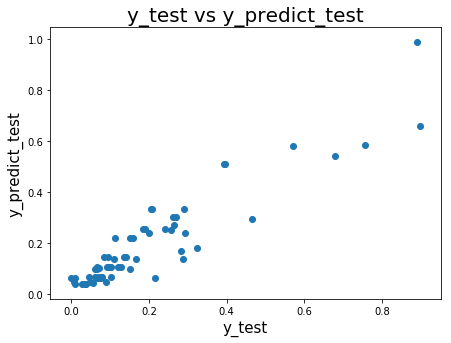

In [698]:
# Plotting in scatter plot

plt.figure(figsize=(7,5))                          # setting the figure size
plt.scatter(y_test,y_predict_test)                 # Plotting with scatter plot
plt.title('y_test vs y_predict_test',fontsize=20)  # Setting title
plt.xlabel('y_test',fontsize=15)                   # Setting x-label
plt.ylabel('y_predict_test',fontsize=15)           # Setting y-label
plt.show()

### Calculation of r-squared score for test set

In [699]:
# Calculating the r-squared score

from sklearn.metrics import r2_score

r2_score(y_test, y_predict_test)

0.8563389304748341

The r-squared score for test set is **0.856**

# Conclusion

- We have created our model and predicted the test set manually and using RFE method.
- Our error terms normalitiy is showing that the predicted mechanisms is correct.
- We have generated the r-squared score for both train and test set. For train set it is 0.928 and for test set it is 0.856.
- And, lastly we have visualized the y-test and y-predict, which shows us the linear plot.

We can see our equation for our best fitted line as below:

price = 0.8593 * enginesize + 0.1198 * CarName_audi + 0.2311 * CarName_bmw + 0.2391 * CarName_buick + 0.2143 * CarName_porsche + 0.1091 * CarName_saab + 0.1274 * CarName_volvo + 0.1640 * enginelocation_rear + 0.2131 * cylindernumber_two

As we can see from the above equation we can surely say that the price of a car affects most by the enginesize: **If we increase one unit of an enginesize keeping all other variables constant the price will increase by 0.8593**.